## Top 5 Fastest vs. Most Expensive Cars

In [2]:
# import all package needed
import pandas as pd
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches

In [3]:
# Load the dataset
df = pd.read_csv('Sport car price.csv')

In [4]:
# show top of dataset
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [6]:
# Clean the dataset
df['Price (in USD)'] = df['Price (in USD)'].replace(r'[\$,]', '', regex=True).astype(float)
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'], errors='coerce')

In [7]:
# Create a combined name for better readability
df['Car'] = df['Car Make'] + ' ' + df['Car Model']

# Top 5 fastest accelerating cars
top_5_fastest = df.nsmallest(5, '0-60 MPH Time (seconds)')[['Car', '0-60 MPH Time (seconds)', 'Price (in USD)']]

# Top 5 most expensive cars
top_5_expensive = df.nlargest(5, 'Price (in USD)')[['Car', '0-60 MPH Time (seconds)', 'Price (in USD)']]

In [9]:
# Display the top 5 fastest and top 5 most expensive car DataFrames again to verify uniqueness
top_5_fastest = df.nsmallest(5, '0-60 MPH Time (seconds)')[['Car', '0-60 MPH Time (seconds)', 'Price (in USD)']]
top_5_expensive = df.nlargest(5, 'Price (in USD)')[['Car', '0-60 MPH Time (seconds)', 'Price (in USD)']]

# Show number of unique cars in each selection
top_5_fastest['Car'].value_counts(), top_5_expensive['Car'].value_counts()

(Car
 Rimac C_Two     3
 Rimac Nevera    2
 Name: count, dtype: int64,
 Car
 Bugatti Chiron Super Sport 300+    2
 Bugatti Chiron                     1
 Lamborghini Sián                   1
 Bugatti Chiron Pur Sport           1
 Name: count, dtype: int64)

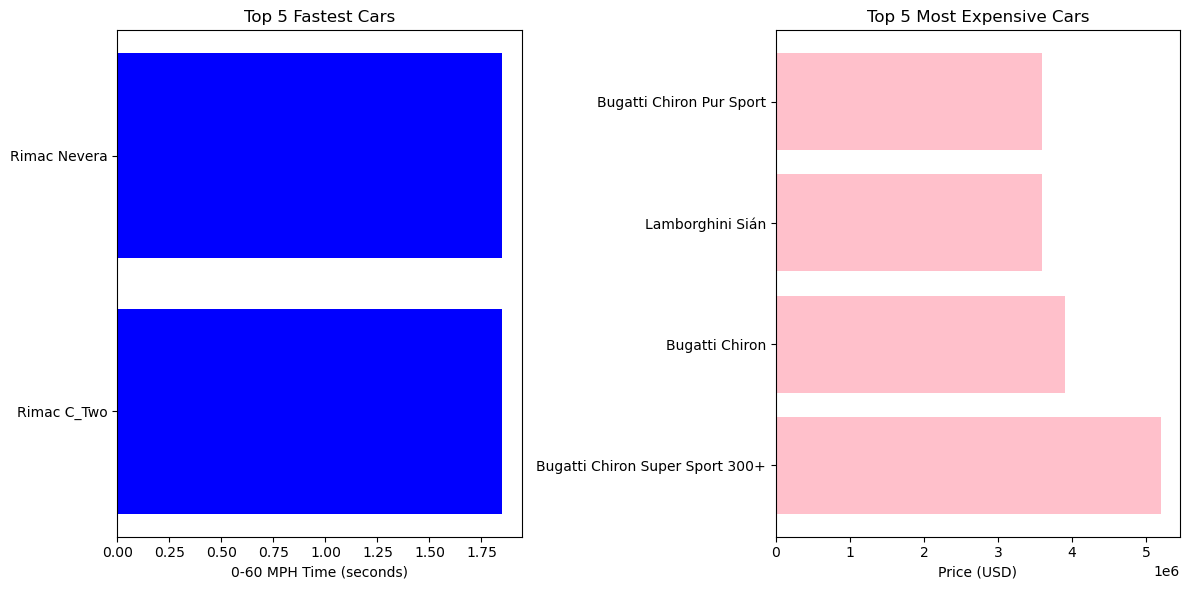

In [10]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Fastest Cars Plot
plt.subplot(1, 2, 1)
plt.barh(top_5_fastest['Car'], top_5_fastest['0-60 MPH Time (seconds)'], color='blue')
plt.xlabel('0-60 MPH Time (seconds)')
plt.title('Top 5 Fastest Cars')

# Most Expensive Cars Plot
plt.subplot(1, 2, 2)
plt.barh(top_5_expensive['Car'], top_5_expensive['Price (in USD)'], color='pink')
plt.xlabel('Price (USD)')
plt.title('Top 5 Most Expensive Cars')

plt.tight_layout()
plt.savefig('Fast_vs_Expensive_Cars.png')
plt.show()

In [11]:
# Create Word document with image and insights
doc = Document()
doc.add_heading('Top 5 Fastest vs. Most Expensive Cars', 0)

doc.add_paragraph(
    "This analysis compares the top 5 fastest accelerating sports cars (based on 0–60 MPH time) "
    "with the top 5 most expensive cars. It helps evaluate whether higher price directly correlates "
    "with superior acceleration performance."
)

doc.add_picture('Fast_vs_Expensive_Cars.png', width=Inches(6.5))

doc.add_paragraph(
    "Findings:\n"
    "- The top 5 fastest cars are all Rimac models, showcasing elite electric acceleration.\n"
    "- The most expensive cars, dominated by Bugatti and Lamborghini, are fast but not the fastest.\n"
    "- Conclusion: A higher price does not always guarantee the best acceleration performance."
)


# Save the Word document
doc.save('Top_5_Fastest_vs_Expensive_Cars.docx')